# Linear Discriminant Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Accessing the data

In [2]:
wine=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [3]:
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Seperation inot features and target

X=wine.drop(['Wine'],axis=1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
X.shape

(178, 13)

In [6]:
y=wine['Wine']
y.shape

(178,)

## Standardisation of features

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Building the LDA model

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
y.unique()

array([1, 2, 3])

In [10]:
# n_components <= min(n_classes-1, n_features)
#              <= min(3-1, 13)
#               = 2, the dim of the hyperplane onto which we want to project

lda=LinearDiscriminantAnalysis(n_components=2)

## Transformation of the data

In [11]:
X_lda=lda.fit_transform(X_scaled,y)

In [12]:
X_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

## Visualisation of the transformed data

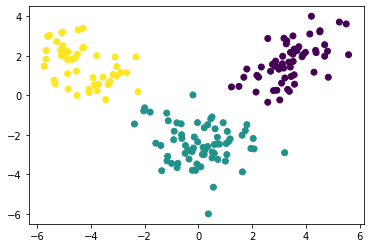

In [13]:
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);

# Locally Linear Embedding

In [14]:
from sklearn.datasets import make_swiss_roll

In [15]:
X,y=make_swiss_roll(n_samples=1000, random_state=100)
X

array([[-9.02243256,  0.58237783, -3.91158679],
       [ 3.63249892,  8.02698255,  6.37347947],
       [-6.59990375, 20.01826915,  5.68894892],
       ...,
       [ 6.06643253, 20.59885419, -0.90994904],
       [ 1.72607563,  7.66075992, -4.75699209],
       [-6.24197451, 16.34985863, -8.25349579]])

In [16]:
y

array([ 9.8338599 ,  7.33595863,  8.71337301, 12.67421645,  4.75686315,
        5.85815095, 11.03405017, 12.49586783,  6.00081823, 10.13251592,
       13.11290049,  6.68407253,  6.4590663 ,  5.73381711,  6.78298907,
       13.93570086, 12.36232244,  6.33289485, 12.405126  ,  7.29547319,
        8.78110506, 13.57196131, 12.41855283,  7.88016948,  6.36559356,
        8.22624823,  4.7660019 ,  7.09145131, 12.21133145,  4.8561637 ,
       10.35635484, 10.40311269,  5.70338257,  8.31212114,  5.05616771,
       13.10432026, 13.95735025,  5.27732892, 13.10558677, 10.14955752,
       11.71009519, 10.65173266, 10.19612245,  4.90502326,  6.69184284,
        9.84592302, 11.96112869,  7.07513585,  7.40689238, 12.74602342,
       13.90160869, 13.0519348 ,  8.10067058, 10.35650158,  8.05625884,
        7.91860622,  6.39076277,  6.95260412,  5.13520603,  9.47596798,
        8.25848482, 10.29944826, 10.64945129,  6.05636528, 13.51363588,
       13.63180922, 10.38890125,  8.36700007,  8.13535528,  6.63

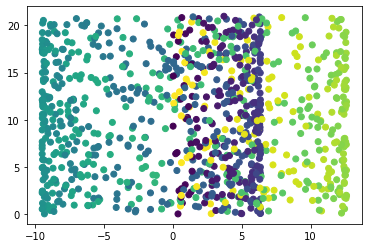

In [17]:
plt.scatter(X[:,0],X[:,1],c=y);

## Building the model

In [21]:
from sklearn.manifold import LocallyLinearEmbedding

In [25]:
lle=LocallyLinearEmbedding(n_neighbors=10,n_components=2)

## Transforming the data

In [26]:
X_lle=lle.fit_transform(X)
X_lle

array([[ 0.00035166, -0.05153918],
       [-0.02608436, -0.01029101],
       [-0.0108567 ,  0.0006093 ],
       ...,
       [-0.03429564,  0.06340633],
       [-0.04373624,  0.03404907],
       [ 0.007696  , -0.01824878]])

## Visualisation

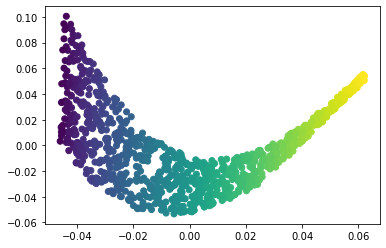

In [27]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [ ]:
# Try the wine data with LLE